*This notebook is my own notes / development playground. It will be disorganized in nature. Feel free to skim through.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import automata as atm
import analysis as ans

In [2]:
state = [
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]
#atm.play(state, 10, verbose = True)

In [3]:
ans.get_alive_matrix(np.array(state))

array([[2., 4., 4., 2.],
       [2., 3., 3., 2.],
       [2., 3., 3., 2.],
       [0., 0., 0., 0.]])

### Cycle Detection

What is a cycle? Intuitively, we understand it as a set of alive cells -- we'll call it a contiguous set
- we define contiguous as existing neighbors -- this means diagonals too

A contiguous set of alive cells that either oscillates with a "pair" set or itself (identity)
- let's call this other set its **complement**

Can we create the fundamental operations for these automata? How can we define these?


Fundamental operations:
- and
    - would this be superimposing a new cycle on top?
- or
- negate
    - we have (cycle complement)
    - this occurs by just updating...
- identity
    - this occurs by just updating...
    
Perhaps some cycles have their complement = identity. This would imply that Updating $\equiv$ negating. No update is identity.
- To call an update a negate is a very shady declaration ... it's not a pure negate
- it is a deterministic function, but I'm sure we can disprove it using boolean logic
    - ie, demonstrate update(A) = A and update(A)
    - A = update(A) or A

Perhaps we define the and/or operations as just the element-wise and/or of two states? What are the properties of these? What do they give us??

In [16]:
state = ans.get_random_state((5, 5))

In [17]:
state

array([[1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 0]])

In [22]:
atm.update(state).astype(int)

array([[1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1]])

In [21]:
np.logical_and(atm.update(state), state).astype(int)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0]])

|██    ██|
|████████|
|        |
|    ██  |

i=0|-------
|██    ██|
|████████|
|      ██|
|        |

i=1|-------
|██    ██|
|████  ██|
|  ██  ██|
|        |

i=2|-------
|██████  |
|████  ██|
|████    |
|        |

i=3|-------
|██  ██  |
|        |
|██████  |
|        |

i=4|-------
|        |
|██  ██  |
|  ██    |
|  ██    |

i=5|-------
|        |
|  ██    |
|██████  |
|        |

i=6|-------
|        |
|██████  |
|██████  |
|  ██    |

i=7|-------
|  ██    |
|██  ██  |
|        |
|██████  |

i=8|-------
|  ██    |
|  ██    |
|██  ██  |
|  ██    |

i=9|-------
|        |
|██████  |
|██  ██  |
|  ██    |

i=10|-------
|  ██    |
|██  ██  |
|██  ██  |
|  ██    |

i=11|-------
|  ██    |
|██  ██  |
|██  ██  |
|  ██    |

i=12|-------
|  ██    |
|██  ██  |
|██  ██  |
|  ██    |

i=13|-------
|  ██    |
|██  ██  |
|██  ██  |
|  ██    |

i=14|-------


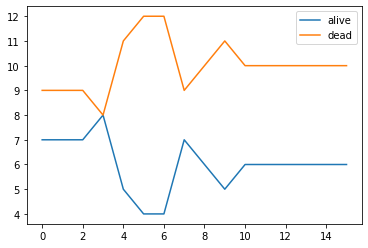

In [8]:
state = [
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 1, 0]
]
states = ans.play(np.array(state), n = 15, verbose = True)

plt.plot(ans.get_survival_stats(states))
plt.legend(labels = ['alive', 'dead'])
plt.show()